# <div align='center'> **Wine Quality Classification**
In this jupyter notebook, Wine Dataset was obtained from Kaggle https://www.kaggle.com/datasets/rajyellow46/wine-quality
The goal of this project is to perform classification using multiple Machine Learning Algorithms 

## Contents
1.  Introduction
2.  The Aim of Analysis
3.  General Information of the Data
4.  Data Exploration
5.  Checking for NULL Values 
6.  Filling of NULL values with Mean value
7.  Overview about Outliers 
     * 8.1    Median Imputation
8.  Separating Data into Training and Testing Data
9. Data Normalization
10.  LOGISTIC REGRESSION CLASSIFIER
     * 10.a  LogisticRegression
     * 10.b  Performance Measurements
     * 10.c  Identifying optimal parameters for Logistic Regression using GridSearchCV
     * 10.d  Confusion Matrix
11.  SUPPORT VECTOR MACHINE
     * 11.a  SVM
     * 11.b  Performance Measurements
     * 11.c  Identifying optimal parameters for Support Vector Machine using GridSearchCV
     * 11.d  Confusion Matrix
12.  Random Forest CLassifier
     * 12.a  RandomForestClassifier
     * 12.b  Performance Measurements
     * 12.c  Identifying optimal parameters for Random  Forest Classifier using GridSearchCV
     * 12.d  Confusion Matrix

# <div align="center">  **1. Introduction**
### <font color=' #6a6462 ' > The dataset was downloaded from the UCI Machine Learning Repository.
### <font color=' #6a6462'> The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine

# <div align="center"> **2. The Aim of Analysis**

### <font color="gray"> This study aims to search for the elements which effects WINE QUALITY by using multiclass decision classification methods such as Confusion Matrix, Accuracy, Cross Validation, K-Fold Cross Validation, Grid Search CV using multiple Classifiers such as Logistic Regression, Support Vector Machine and Random Forest Classifier.

# <div align="center">  **3. General Information of the Data**


### <font color="black">Type:<font color="gray"> Two types of wines such as red wine and white wine.
    
### <font color="black">Fixed acidity:<font color="gray"> Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic)

### <font color="gray">Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine, Acidity in food and drink tastes tart and zesty. Tasting acidity is also sometimes confused with alcohol. Wines with higher acidity feel lighter-bodied because they come across as “spritzy”. Reducing acids significantly might lead to wines tasting flat. If you prefer a wine that is richer and rounder, you enjoy slightly less acidity.

### <font color="black">Volatile acidity:<font color="gray"> These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavour.

### <font color="black">Citric acid:<font color="gray"> This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness.

### <font color="black">Residual sugar: <font color="gray">This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped.

### <font color="black">Chlorides: <font color="gray">Chloride concentration in the wine is influenced by terroir and its highest levels are found in wines coming from countries where irrigation is carried out using salty water or in areas with brackish terrains.

### <font color="black">Free sulfur dioxide:<font color="gray"> This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour.

### <font color="black">Total sulfur dioxide:<font color="gray"> This is the sum total of the bound and the free sulfur dioxide. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.

### <font color="black">Density: <font color="gray">This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. 

### <font color="black">pH: <font color="gray"> Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

### <font color="black">Sulphates: <font color="gray">These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavour. 

### <font color="black">Alcohol: <font color="gray"> It's usually measured in % vol or alcohol by volume (ABV).

### <font color="black">Quality:<font color="gray"> Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.


# <div align="center"> **4. Data Exploration**

### 0. Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay, roc_curve, precision_score, recall_score
from sklearn.metrics import f1_score,roc_auc_score
from IPython.display import Markdown as md
from scipy.stats import norm

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### ***Getting Data***

In [3]:
data=pd.read_csv("winequalityN.csv")

#### ***About data***

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
col=data.columns

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**First 5 rows**

In [7]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Changing the Label for the Type from String to int where types White and Red are represented by 0 and 1 respectively**

In [8]:
enc=LabelEncoder()
data["type"]=enc.fit_transform(data["type"])

# <div align="center"> **5. Checking for NULL Values**

In [9]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Imputing NULL values with the mean values of that specified column

In [10]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(data)
data=imputer.transform(data)

In [11]:
data=pd.DataFrame(data,columns=col)

**Distribution of variables**

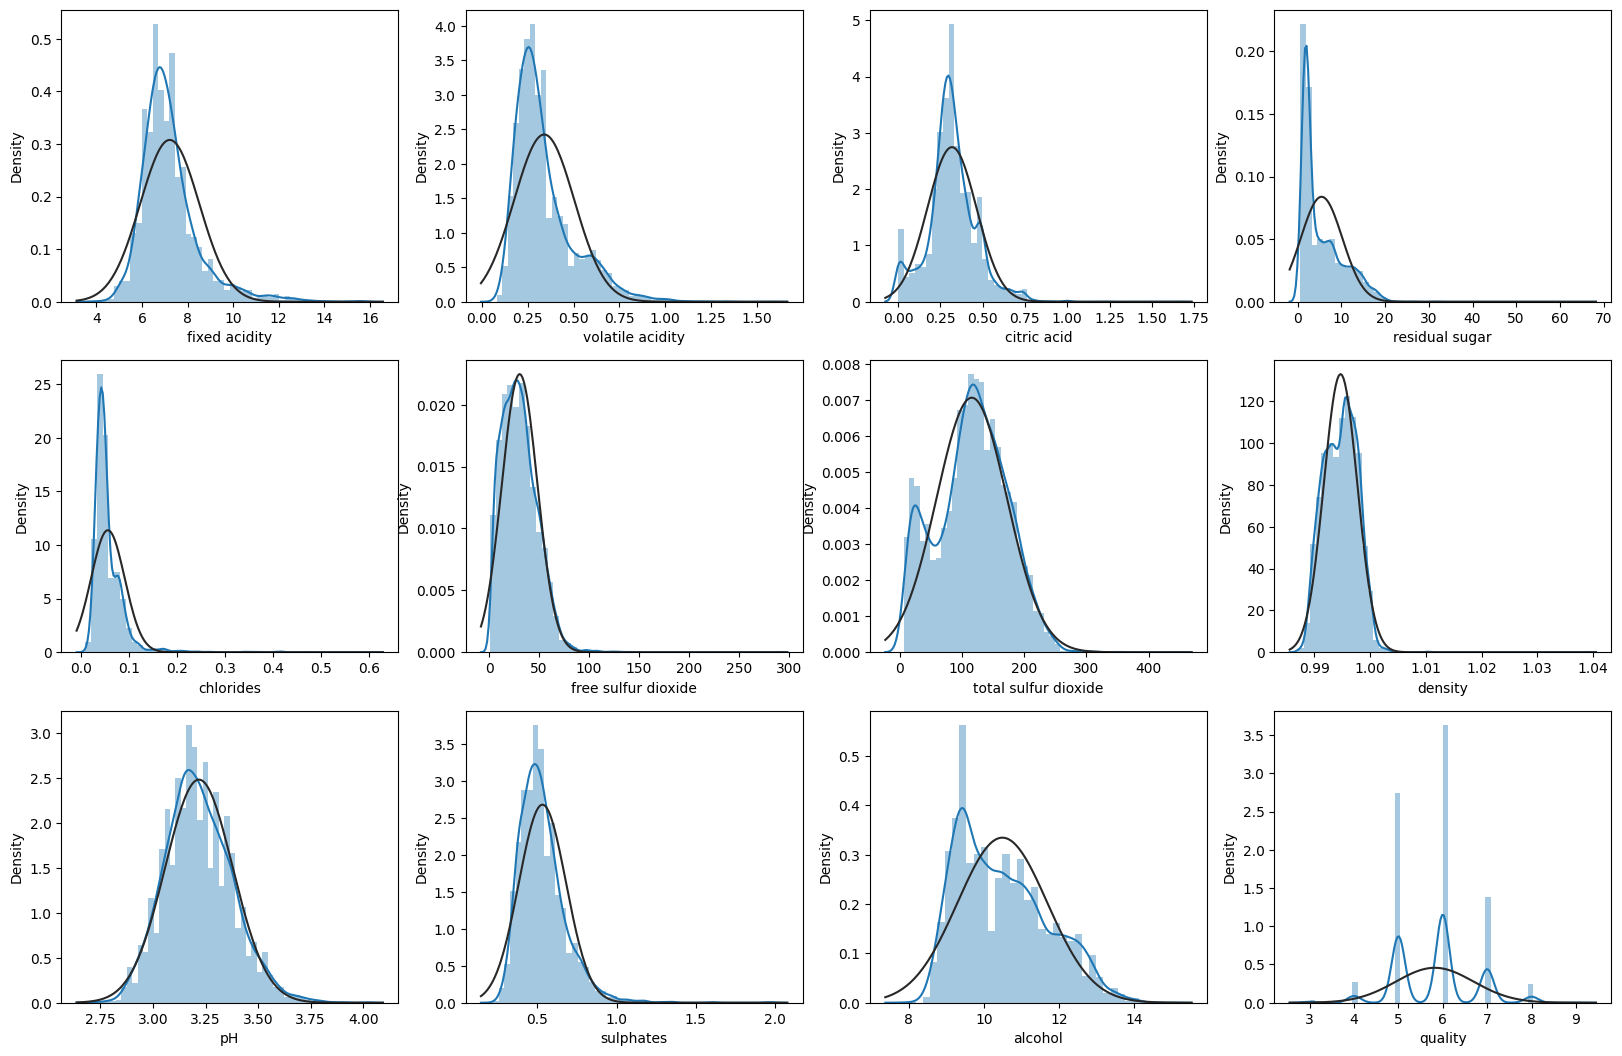

In [12]:
plt.figure(figsize = (20,22))

for i in range(1,13):
    plt.subplot(5,4,i)
    sns.distplot(data[data.columns[i]], fit=norm)
    

# <div align="center">**7.  Overview about Outliers**

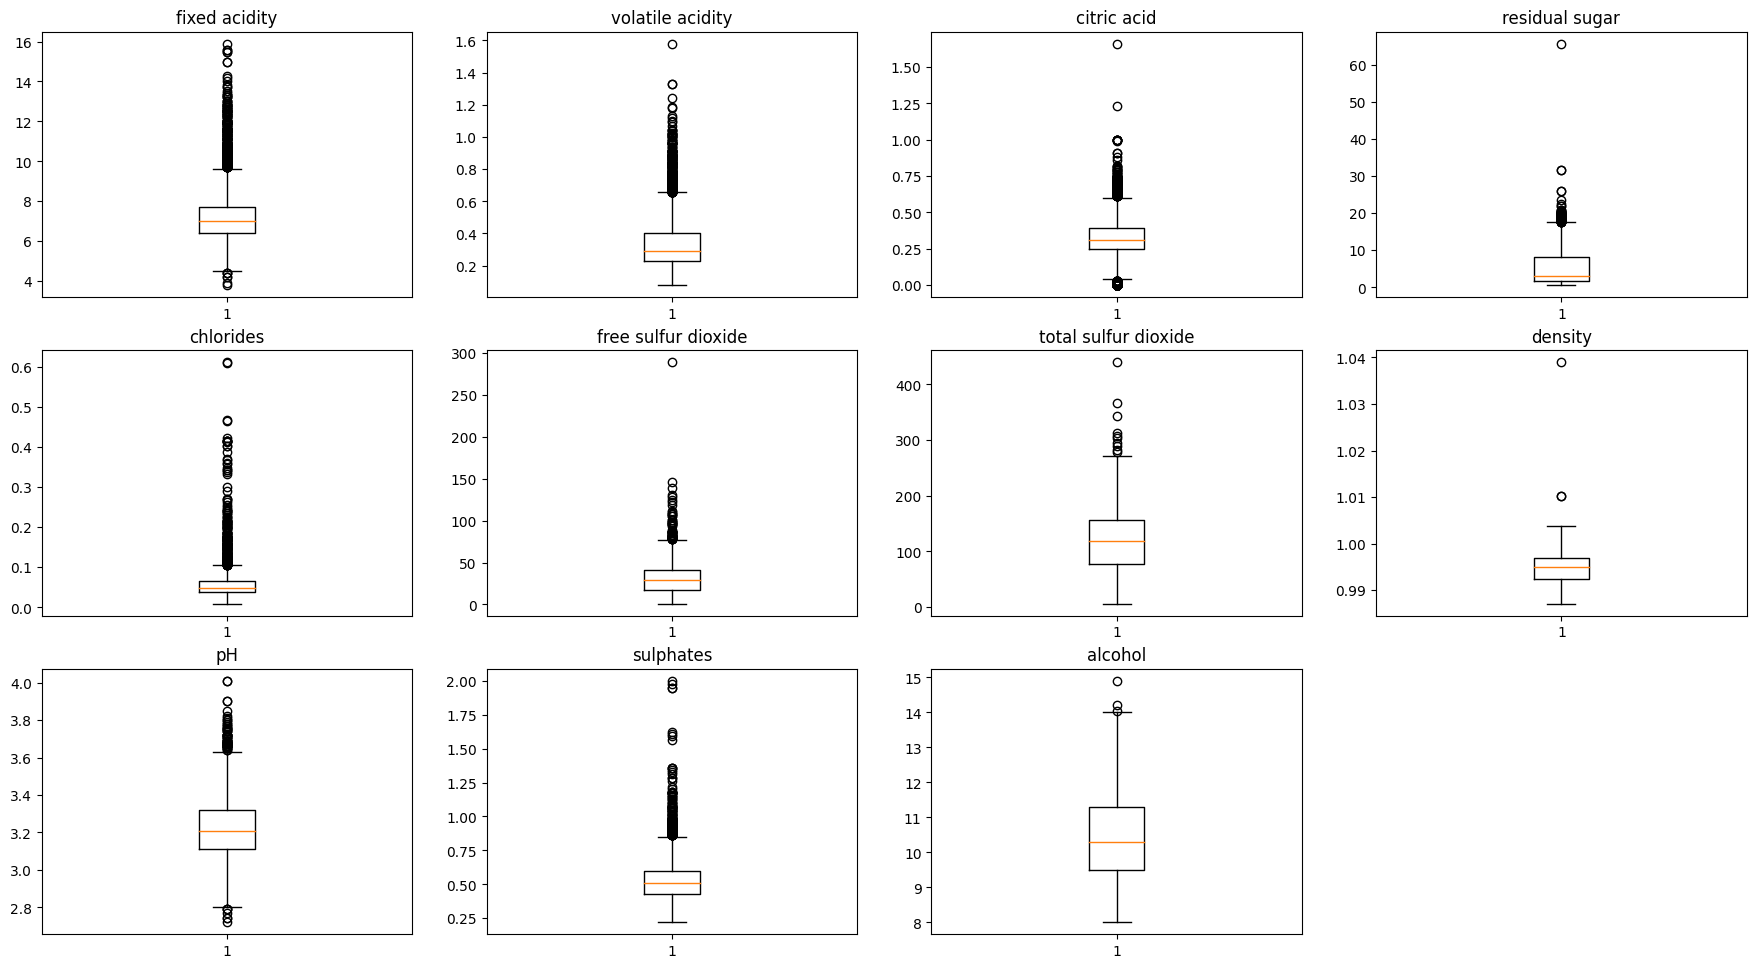

In [13]:
outliers_vars =col.drop('type')
plt.figure(figsize=(22,20))

for i in range(0,11):
    plt.subplot(5, 4, i+1)
    plt.boxplot(data[outliers_vars[i]])
    plt.title(outliers_vars[i])

### Replacing the outliers with the median value of that column

In [14]:
def Impute_Outliers(col_name):
    out1 = []
    mean=data[col_name].mean()
    std=data[col_name].std()
    threshold=3
    for i,fa in enumerate(data[col_name]): 
        if abs(fa - mean)> threshold * std:
            out1.append(fa)
    data[col_name]=data[col_name].replace(out1,threshold*std)

In [15]:
for col_name in col.drop('quality'):
    Impute_Outliers(col_name)

# <div align="center">**8.  Data Normalization**

In [16]:
for col_name in col.drop(['type','quality']):
    std=data[col_name].std()
    mean=data[col_name].mean()
    for i,fa in enumerate(data[col_name]):
        data[col_name]=data[col_name].replace(fa,(fa-mean)/std)

# <div align="center">**9. Creating Training and Testing data**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("quality",axis=1), data["quality"], test_size=0.3)

# <div align="center">**10. LOGISTIC REGRESSION CLASSIFIER**

## <font color="black"> 9.1a Logistic Regression

In [110]:
logreg=LogisticRegression(max_iter=100000)

In [111]:
logreg.fit(X_train,y_train,)
pred_test=logreg.predict(X_test)
pred_train=logreg.predict(X_train)

## <font color="black"> 9.1b Performance Measurements

### <font color='grey'> Accuracy

In [112]:
logreg_acc=logreg.score(X_test,y_test)
print("Accuracy Score of our Logistic Regression Model: ",logreg_acc)

Accuracy Score of our Logistic Regression Model:  0.538974358974359


### <font color='grey'> Classification Report

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         9
         4.0       1.00      0.05      0.09        65
         5.0       0.58      0.59      0.58       631
         6.0       0.52      0.71      0.60       854
         7.0       0.56      0.20      0.30       339
         8.0       0.00      0.00      0.00        51
         9.0       0.00      0.00      0.00         1

    accuracy                           0.54      1950
   macro avg       0.38      0.22      0.22      1950
weighted avg       0.54      0.54      0.51      1950



## <font color="black"> 9.1c Finding Optimal Parameters using GridSearchCV

In [89]:
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=5)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
c_values = [9,8,7,6,5,4,3,2, 1.0]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [90]:
grid_result=grid_search.fit(X_train,y_train)

In [91]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.534426 using {'C': 3, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 9, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 9, 'penalty': 'l2', 'solver': 'lbfgs'}
0.534349 (0.019869) with: {'C': 9, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 9, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 9, 'penalty': 'l1', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 9, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 8, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 8, 'penalty': 'l2', 'solver': 'lbfgs'}
0.534387 (0.019897) with: {'C': 8, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 8, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 8, 'penalty': 'l1', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 8, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 7, 'penalty': 

### Using the Logistic Regression Algorithm with the best hyperparameters

In [28]:
logreg=LogisticRegression(solver=grid_result.best_params_['solver'],penalty=grid_result.best_params_['penalty'],C=grid_result.best_params_['C'])

In [32]:
logreg.fit(X_train,y_train)
logreg_acc=logreg.score(X_test,y_test)
y_pred=logreg.predict(X_test)
print("Accuracy of Logistic Regression with Optimal Parameters are: ",logreg_acc)

Accuracy of Logistic Regression with Optimal Parameters are:  0.5548717948717948


## <font color="black"> 9.1d Confusion Matrix

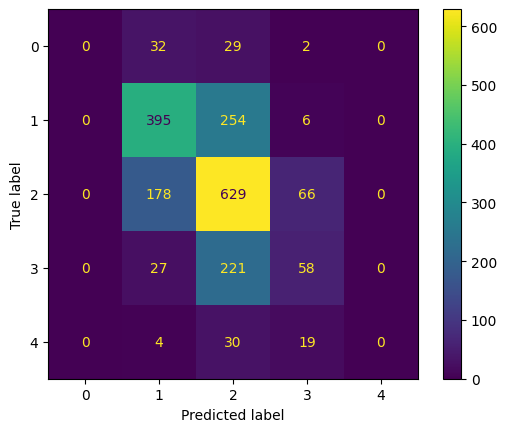

In [33]:
conf=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(conf).plot()

# <div align="center">**11. Support Vector Machine**

## <font color="black"> 11.a SVM

In [ ]:
svm=SVC(max_iter=100000)

In [19]:
svm.fit(X_train,y_train)
pred_test=svm.predict(X_test)
pred_train=svm.predict(X_train)

## <font color="black"> 11.b Performance Measurements

### <font color='grey'> Accuracy

In [20]:
svm_acc=svm.score(X_test,y_test)
print("Accuracy Score of our SVM Model: ",svm_acc)

Accuracy Score of our SVM Model:  0.5517948717948717


### <font color='grey'> Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        14
         4.0       0.00      0.00      0.00        65
         5.0       0.62      0.64      0.63       633
         6.0       0.51      0.73      0.60       837
         7.0       0.54      0.17      0.26       349
         8.0       0.00      0.00      0.00        52

    accuracy                           0.55      1950
   macro avg       0.28      0.26      0.25      1950
weighted avg       0.52      0.55      0.51      1950



## <font color="black"> 11.c Finding Optimal Parameters using GridSearchCV

In [22]:
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=5)
svm=SVC(max_iter=1000)
kernels = ['rbf', 'poly','sigmoid']
gammas = ['scale','auto']
degrees=[2,3,4,5,6,7]
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(kernel=kernels,gamma=gammas,C=c_values,degree=degrees)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

In [23]:
grid_result=grid_search.fit(X_train,y_train)

In [24]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.568945 using {'C': 1.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.427093 (0.028360) with: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.315247 (0.033892) with: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.402602 (0.025095) with: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.427499 (0.031690) with: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
0.321435 (0.028563) with: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
0.403699 (0.023415) with: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.427093 (0.028360) with: {'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
0.344139 (0.024681) with: {'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
0.402602 (0.025095) with: {'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.427499 (0.031690) with: {'C': 100, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
0.344358 (0.017952) with: {'C': 100, 'degree': 3, 'gamma': 

### Using the Logistic Regression Algorithm with the best hyperparameters

In [30]:
svm=SVC(kernel=grid_result.best_params_['kernel'],gamma=grid_result.best_params_['gamma'],C=grid_result.best_params_['C'],degree=grid_result.best_params_['degree'])

In [31]:
svm.fit(X_train,y_train)
svm_acc=svm.score(X_test,y_test)
y_pred=svm.predict(X_test)
print("Accuracy of Support Vector Machine with Optimal Parameters are: ",svm_acc)

Accuracy of Support Vector Machine with Optimal Parameters are:  0.5517948717948717


## <font color="black">11.d Confusion Matrix

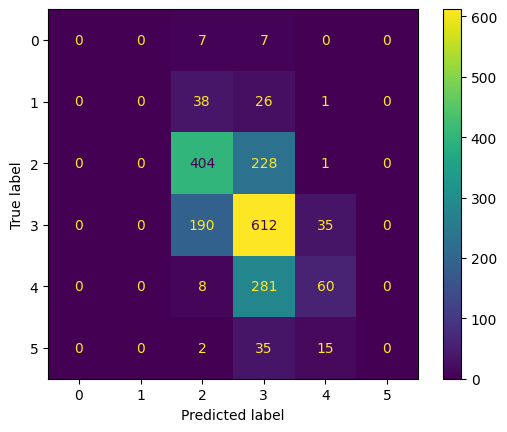

In [32]:
conf=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(conf).plot()

# <div align="center">**12. Random Forest Classifier**

## <font color="black"> 12.a Random Forest Classifier

In [18]:
rfc=RandomForestClassifier()

In [19]:
rfc.fit(X_train,y_train)
pred_test=rfc.predict(X_test)
pred_train=rfc.predict(X_train)

## <font color="black"> 12.b Performance Measurements

### <font color='grey'> Accuracy

In [20]:
rfc_acc=rfc.score(X_test,y_test)
print("Accuracy Score of our Random Forest Classifier Model: ",rfc_acc)

Accuracy Score of our Random Forest Classifier Model:  0.6728205128205128


### <font color='grey'> Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        11
         4.0       0.75      0.15      0.25        59
         5.0       0.73      0.71      0.72       667
         6.0       0.63      0.78      0.70       832
         7.0       0.69      0.52      0.59       314
         8.0       0.95      0.33      0.49        63
         9.0       0.00      0.00      0.00         4

    accuracy                           0.67      1950
   macro avg       0.54      0.36      0.39      1950
weighted avg       0.68      0.67      0.66      1950



## <font color="black"> 12.c Finding Optimal Parameters using GridSearchCV

In [22]:
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=5)
estimators=[50,100,150]
criterion=["gini","entropy","log_loss"]
min_samples_split=[2,3,4]
grid = dict(n_estimators=estimators,criterion=criterion,min_samples_split=min_samples_split)
grid_search = GridSearchCV(estimator=rfc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

In [ ]:
grid_result=grid_search.fit(X_train,y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Using the Logistic Regression Algorithm with the best hyperparameters

In [ ]:
rfc=RandomForestClassifier(n_estimators=grid_result.best_params_['n_estimators'],criterion=grid_result.best_params_['criterion'],min_samples_split=grid_result.best_params_['min_samples_split'])

In [129]:
rfc.fit(X_train,y_train)
rfc_acc=rfc.score(X_test,y_test)
y_pred=rfc.predict(X_test)
print("Accuracy of Random Forest Classifier with Optimal Parameters are: ",rfc_acc)

Accuracy of Support Vector Machine with Optimal Parameters are:  0.538974358974359


## <font color="black"> 12.d Confusion Matrix

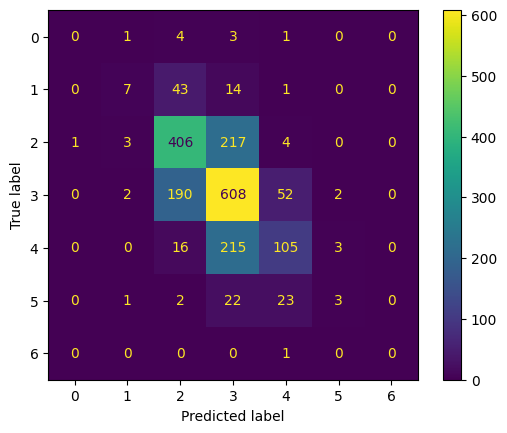

In [130]:
conf=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(conf).plot()